<a href="https://colab.research.google.com/github/Sagar856/Data-Science-Assignments/blob/main/Assignment_5_Q1_Multi_Linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Question-1`

In [ ]:
# Prepare a prediction model for profit of 50_startups data.
# Do transformations for getting better predictions of profit and
# make a table containing R^2 value for each prepared model.

# R&D Spend -- Research and devolop spend in the past few years
# Administration -- spend on administration in the past few years
# Marketing Spend -- spend on Marketing in the past few years
# State -- states from which data is collected
# Profit  -- profit of each state in the past few years


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stat
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
data = pd.read_csv('/content/50_Startups.csv')

In [ ]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Descriptive Statistics

In [ ]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Checking Datatypes

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


### Renaming column names

In [ ]:
df = data.copy()
df = df.rename({'R&D Spend':'RnD','Administration':'Admin','Marketing Spend': 'Marketing'}, axis = 1)

In [ ]:
df.head(2)

,RnD,Admin,Marketing,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


### Checking for missing(null) values

In [ ]:
df.isnull().sum()

RnD          0
Admin        0
Marketing    0
State        0
Profit       0
dtype: int64

In [ ]:
df[df.values==0.0]

,RnD,Admin,Marketing,State,Profit
19,86419.70,153514.11,0.00,New York,122776.86
47,0.00,135426.92,0.00,California,42559.73
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


**Observation: Notice there are some '0' values in data in some features,**


*   Here context of zero is absolute zero, i.e there is no spend regards to that department



In [ ]:
print('Zero values in RnD spend is:', (df['RnD']==0).sum())
print('Zero values in Admin spend is:', (df['Admin']==0).sum())
print('Zero values in Marketing spend is:', (df['Marketing']==0).sum())
print('Zero values in Profit spend is:', (df['Profit']==0).sum())

Zero values in RnD spend is: 2
Zero values in Admin spend is: 0
Zero values in Marketing spend is: 3
Zero values in Profit spend is: 0


### Visualizing missing values

<Axes: >

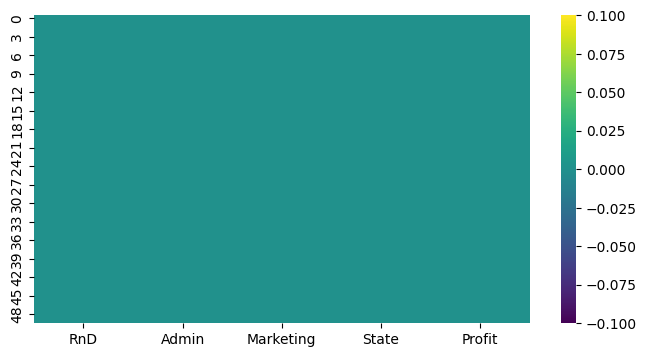

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cmap = 'viridis')

**Observation: No missing values are present in dataset**

### Checking for duplicate records

In [ ]:
df[df.duplicated()]

,RnD,Admin,Marketing,State,Profit


**Observation: There are no duplicate records in dataset**

### Visualizing continious datatype for outlier detection

In [ ]:
continuous_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Continious feature count:{}'.format(len(continuous_feature)))

Continious feature count:4


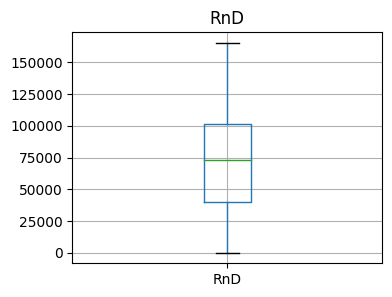

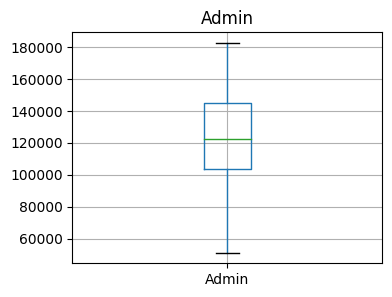

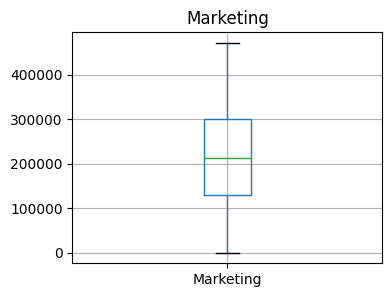

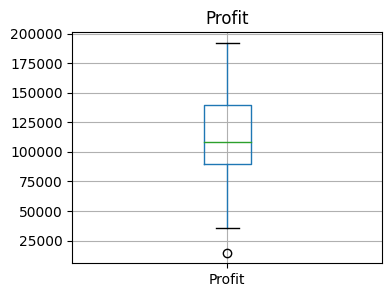

In [ ]:
for feature in continuous_feature:
  data = df.copy()
  plt.figure(figsize = (4,3))
  data.boxplot(column = feature)
  plt.title(feature)
  plt.show()

**Observation: There is outlier in the Profit variable that is our dependent feature, but there are no outlier in our independent variables**


*   **Note** : we need to handle outliers the best way, sometimes to remove outlier to stop them fro skewing our analysis, but that will lead to information loss as we have smaller dataset



### **Let's try to find outlier in Profit**


*   **Note:** Transforming variables can also eliminate outliers, The transformed variable reduces the variation caused by extreme values



In [ ]:
Q1 = np.quantile(df.Profit, 0.25)
Q3 = np.quantile(df.Profit, 0.75)
med = np.median(df.Profit)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
print('First Quantile:', Q1,'\n','Second Quantile:',med, '\n','Third Quantile:',Q3,'\n','Inter-Quartile_range:',IQR,'\n','upper Whiskers:',upper_bound,'\n','Lower Whiskers:',lower_bound)

First Quantile: 90138.9025 
 Second Quantile: 107978.19 
 Third Quantile: 139765.97749999998 
 Inter-Quartile_range: 49627.07499999998 
 upper Whiskers: 214206.58999999997 
 Lower Whiskers: 15698.290000000023


In [ ]:
Outliers = df.Profit[(df.Profit <= lower_bound) | (df.Profit >= upper_bound)]
print('Outlier in Profit:', Outliers)

Outlier in Profit: 49    14681.4
Name: Profit, dtype: float64


In [ ]:
display(df[df.index.isin([49])])

,RnD,Admin,Marketing,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


### Lets Try data transformation on Profit to check wheater outlier get removed.

<ipython-input-19-4b9371fde3b2>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


{'whiskers': [<matplotlib.lines.Line2D at 0x79e701b4bbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x79e701b80130>,
 'boxes': [<matplotlib.lines.Line2D at 0x79e701b4b910>],
 'medians': [<matplotlib.lines.Line2D at 0x79e701b80670>],
 'fliers': [<matplotlib.lines.Line2D at 0x79e701b80910>],
 'means': []}

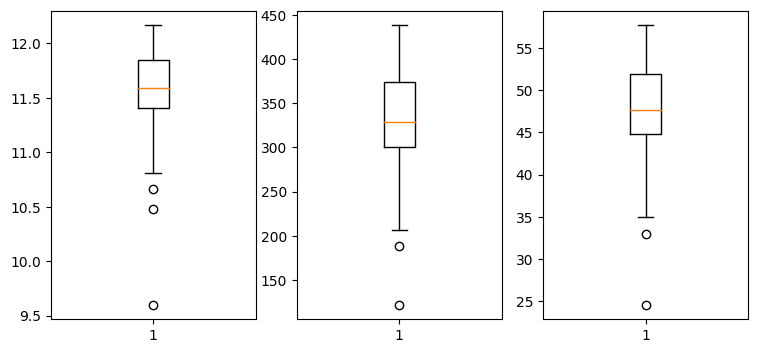

In [ ]:
plt.subplots(figsize = (9,4))
plt.subplot(131)
plt.boxplot(np.log(df.Profit))
plt.subplot(132)
plt.boxplot(np.sqrt(df.Profit))
plt.subplot(133)
plt.boxplot(np.cbrt(df.Profit))

**Observation: Even after data transformation we can't get rid of outlier**

### Before handling ouliers lets build a model and compare its r-squared value with other techniques suits best for this case

Measure goodness of fit by finding rsquared values (percentage of variance)

In [ ]:
raw_model = smf.ols('Profit ~ RnD+Admin+Marketing', data = df).fit()

In [ ]:
# Checking r-squared values
raw_model.rsquared, raw_model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

### Now Lets try Median-Imputation method to handle Outlier in Profit

In [ ]:
df.Profit.median()

107978.19

Text(0.5, 1.0, 'Profit Before Median imputation')

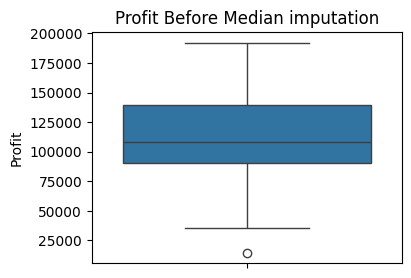

In [ ]:
df1 = df.copy()
plt.figure(figsize= (4,3))
sns.boxplot(df.Profit)
plt.title('Profit Before Median imputation')

Text(0.5, 1.0, 'Profit after Median Imputation')

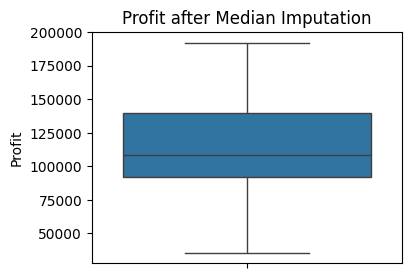

In [ ]:
# Median Imputation

for i in df1['Profit']:
  q1 = np.quantile(df1.Profit, 0.25)
  q3 = np.quantile(df1.Profit,0.75)
  med = np.median(df.Profit)
  iqr = q3 - q1
  upper_bound = q3 + (1.5* iqr)
  lower_bound = q1 - (1.5* iqr)
  if i > upper_bound or i < lower_bound:
    df1['Profit'] = df1['Profit'].replace(i, np.median(df1.Profit))

plt.figure(figsize = (4,3))
sns.boxplot(df1['Profit'])
plt.title('Profit after Median Imputation')

### Let's test our data in model and compare the r-squared with median imputation data model.

In [ ]:
after_median_imputation_model = smf.ols('Profit~RnD+Admin+Marketing', data = df1).fit()

# Checking r-squared and r-squared_adj
after_median_imputation_model.rsquared, after_median_imputation_model.rsquared_adj

(0.9182958360807372, 0.91296730365122)

**Observation : As we can see, after median imputation the model is not performing well**

*  Now we have to try something else to get better results than raw_model


### Now Let's Try Mean-Imputation to handle Outlier.

Text(0.5, 1.0, 'Profit after mean imputation ')

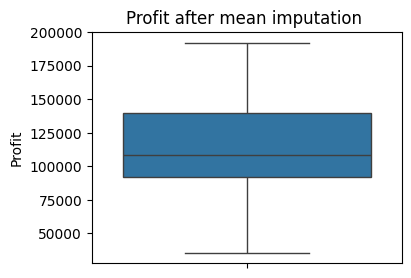

In [ ]:
# Mean Imputation
df2 = df.copy()
for i in df2['Profit']:
  q1 = np.quantile(df2.Profit, 0.25)
  q3 = np.quantile(df2.Profit, 0.75)
  med = np.median(df2.Profit)
  iqr = q3-q1
  upper_bound = q3 + (1.5* iqr)
  lower_bound = q1 - (1.5* iqr)
  if i > upper_bound or i < lower_bound:
    df2['Profit'] = df2['Profit'].replace(i, np.mean(df2['Profit']))

plt.figure(figsize = (4,3))
sns.boxplot(df2.Profit)
plt.title('Profit after mean imputation ')

### Let's test our data in model and compare r-square value with mean imputation data model

In [ ]:
after_mean_imputation_model = smf.ols('Profit~RnD+Admin+Marketing', data = df2).fit()

# Checking r-squared and rsquared_adj
after_mean_imputation_model.rsquared, after_mean_imputation_model.rsquared_adj

(0.9119537155310937, 0.9062115665439912)

**Observation : As we can see, after mean imputation model not performing well, it got worse than median imputation**


*   Now we have to try something else to get better results than raw_model

### The Best thing we can do now is to remove Outlier and check result

In [ ]:
df3 = df.copy()
def drop_outliers(data, field_name):
  iqr = 1.5*(np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
  data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
  data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)


Text(0.5, 1.0, 'Profit after removal of Outliers')

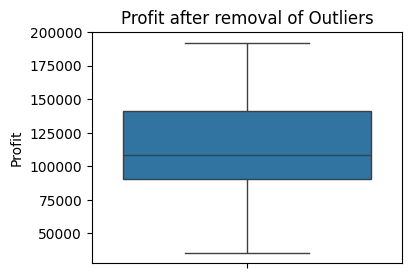

In [ ]:
drop_outliers(df3, 'Profit')
plt.figure(figsize=(4,3))
sns.boxplot(df3.Profit)
plt.title('Profit after removal of Outliers')

### Let's test our data in model and compare r-squared with and without imputation data models

In [ ]:
removed_outlier_model = smf.ols('Profit~RnD+Admin+Marketing', data = df3).fit()

# Checking rsquared and rsquared_adj values
removed_outlier_model.rsquared, removed_outlier_model.rsquared_adj

(0.9613162435129847, 0.9587373264138503)

**Observation : A Slightly better score than raw_modle**


* We will continue with this dataset

### Exploratory Data Analysis(EDA)

Visualizing the distribution of independent features with the help of histograms

In [ ]:
import pylab
def plot_data(data, feature):
  plt.figure(figsize=(9,4))
  plt.subplot(1,2,1)
  data[feature].hist()
  plt.subplot(1,2,2)
  stat.probplot(data[feature], dist = 'norm', plot = pylab)

Text(0.5, 1.0, 'Profit')

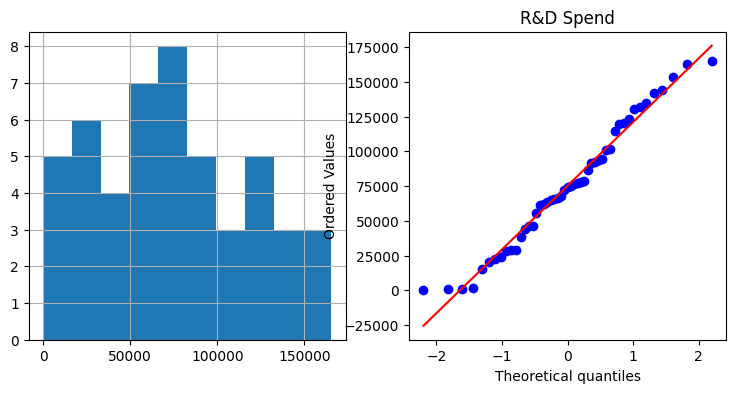

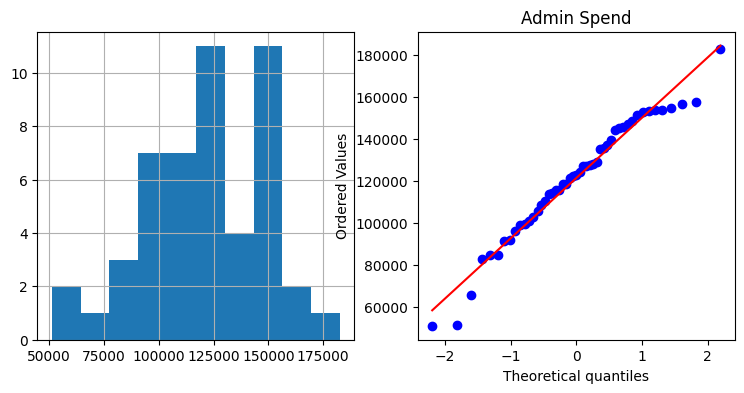

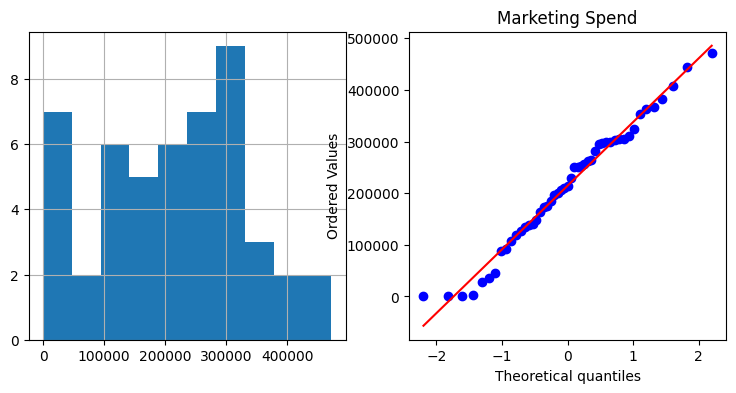

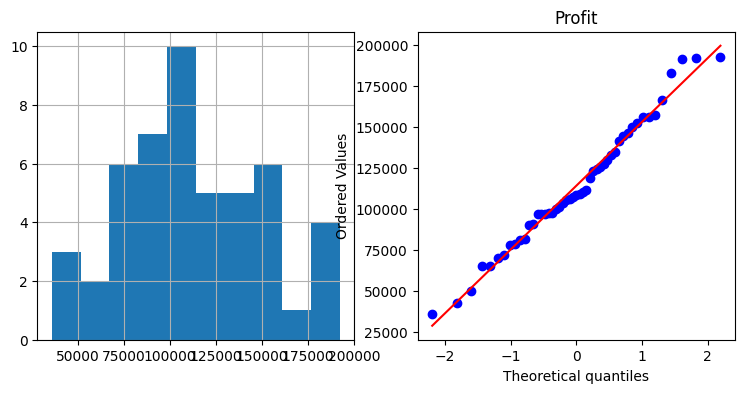

In [ ]:
plot_data(df3, 'RnD')
plt.title('R&D Spend')
plot_data(df3, 'Admin')
plt.title('Admin Spend')
plot_data(df3, 'Marketing')
plt.title('Marketing Spend')
plot_data(df3, 'Profit')
plt.title('Profit')

<Axes: ylabel='State'>

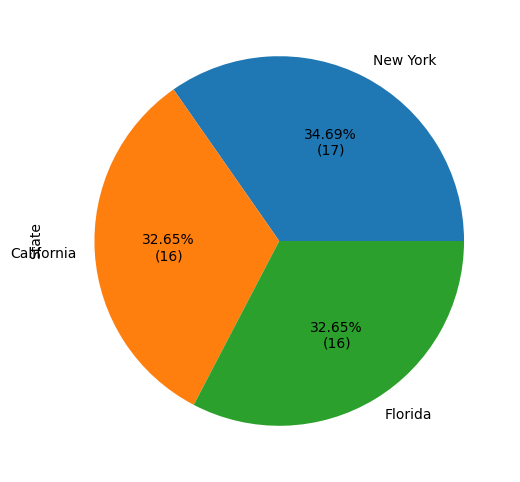

In [ ]:
plt.figure(figsize = (6,6))
df3['State'].value_counts().plot(kind = 'pie', autopct = lambda p: '{:.2f}%\n({:.0f})'.format(p, (p/100)*(df3['State'].value_counts().sum())))

In [ ]:
df3.State.value_counts()

New York      17
California    16
Florida       16
Name: State, dtype: int64

**Observation : The categorical State feature has balanced data, all unique values are approximately equally distributed**


*   **Note:** Most of the categorical features visually looks normally distributed, lets have some hypothetical test to check normality

### The Shapiro-Wilk test is a test of normality, it is used to determine whether or not a sample comes from normal distributution.



*   To perform a shapiro-wilk test in python we can use scipy.stats.shapiro() function.


In [ ]:
df3.columns

Index(['RnD', 'Admin', 'Marketing', 'State', 'Profit'], dtype='object')

In [ ]:
from scipy.stats import shapiro

# Perform shapiro-wilk test

print('RnD spend feature', shapiro(df3.RnD))
print('Admin spend feature', shapiro(df3.Admin))
print('Marketing spend feature', shapiro(df3.Marketing))
print('Profit feature', shapiro(df3.Profit))

RnD spend feature ShapiroResult(statistic=0.9705320596694946, pvalue=0.25422945618629456)
Admin spend feature ShapiroResult(statistic=0.9695430994033813, pvalue=0.23222042620182037)
Marketing spend feature ShapiroResult(statistic=0.9757171273231506, pvalue=0.4016808867454529)
Profit feature ShapiroResult(statistic=0.9793393015861511, pvalue=0.5378792881965637)


**Observation: Since the p-values are not less than 0.05, we fail to reject null hypothesis**

*   We do not have sufficient evidence to say that the sample data does not come from normal distribution.

Visualizing the Relation between each independant feature with respect to the dependent feature

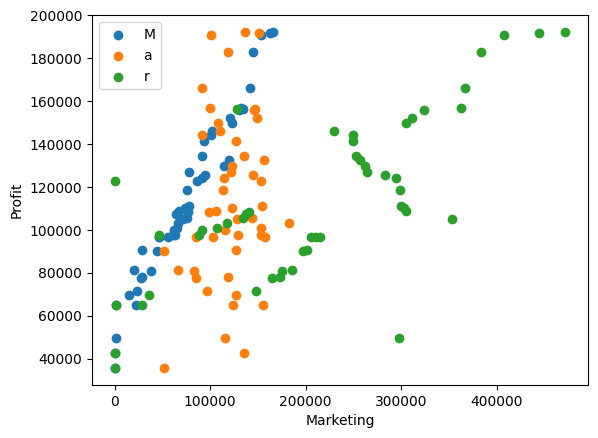

In [ ]:
for feature in continuous_feature:
  labels = feature
  if feature!='Profit':
    data = df3.copy()
    plt.scatter(data[feature], data['Profit'])
    plt.xlabel(feature)
    plt.ylabel('Profit')
    plt.legend(labels)
    # plt.title(feature)

Observation : R&D feature has good linear relation with Profit as compare to other

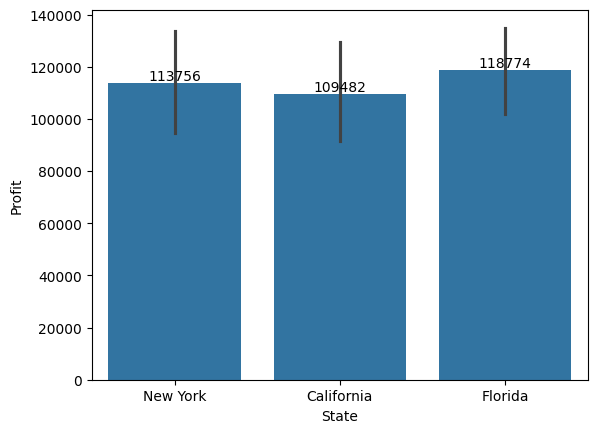

In [ ]:
ax = sns.barplot(x = 'State', y = "Profit", data = df3)
for i in ax.containers:
  ax.bar_label(i,)

**Observation : There is not much of difference between how much profit each state generates from each other and there is'nt any direct relation**


*   **Note:** We are going to drop this feature(State) while building  model as it is irrelavent

In [ ]:
df4 = df3.drop('State', axis = 1)
df4.head()

,RnD,Admin,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


### Checking for correlation between variables

In [ ]:
df4.corr()

,RnD,Admin,Marketing,Profit
RnD,1.000000,0.243438,0.711654,0.978437
Admin,0.243438,1.000000,-0.037280,0.205841
Marketing,0.711654,-0.037280,1.000000,0.739307
Profit,0.978437,0.205841,0.739307,1.000000


<Axes: >

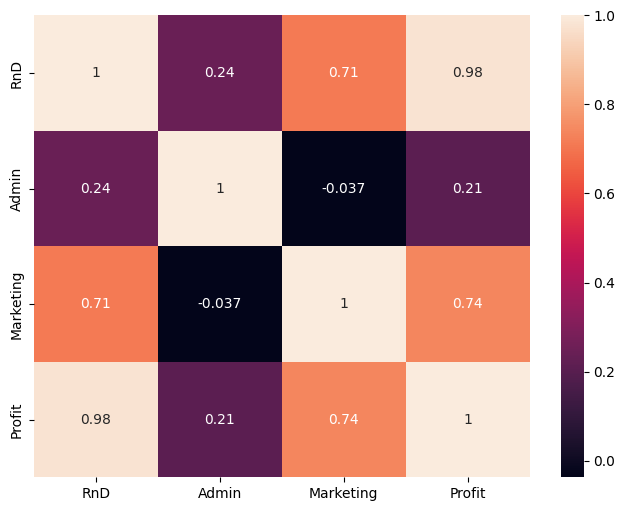

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df4.corr(), annot = True)

### Plotting Correlation on pairplot

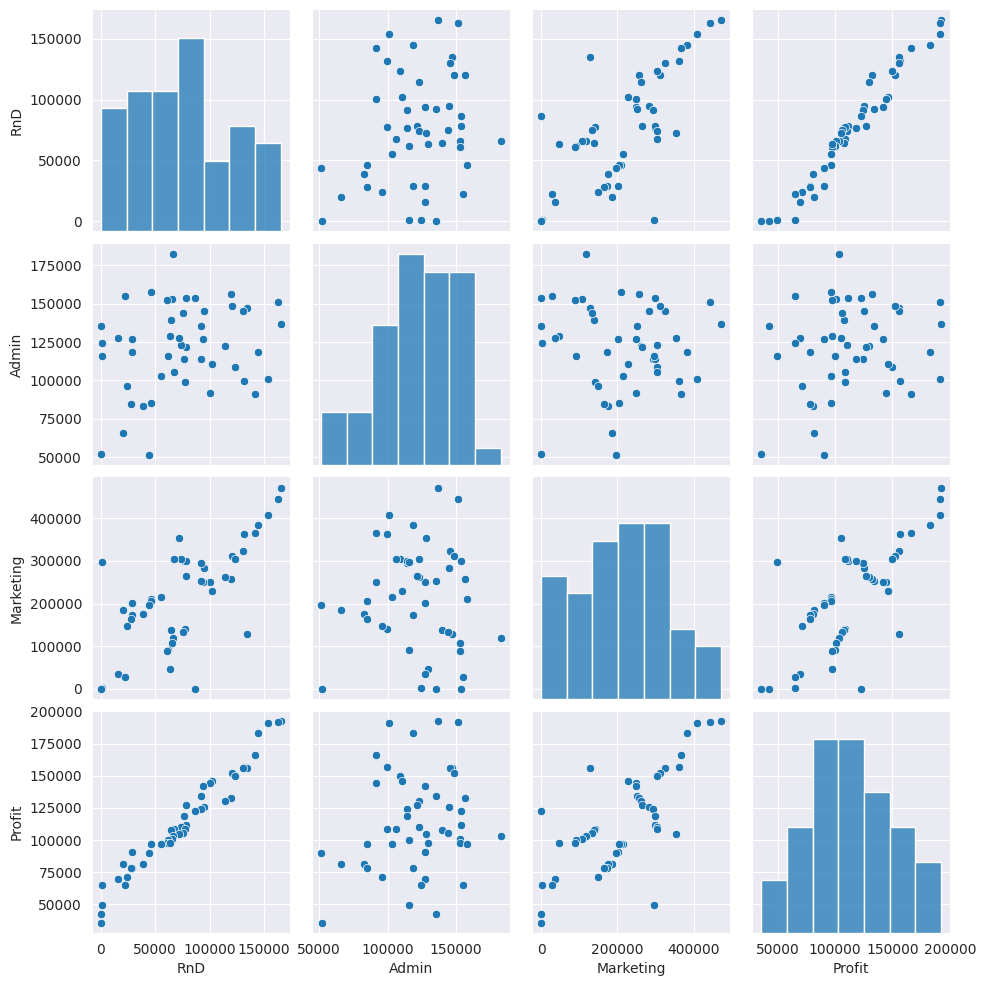

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(df4)

**Observation : R&D has highest score of correlation with profit**

*   **Note:** Marketing and R&D also have collinearity among them which will affect our modle



## Feature Enginering

Applying some data transformations to increase the linear relationship and improve our model predictions.

### Applying Standard Scaler


*   For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance)
*   x_scaled = x – mean/std_dev
*   **However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler.





In [ ]:
df_standard_scaled = df4.copy()
features = df_standard_scaled[continuous_feature]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,RnD,Admin,Marketing,Profit
0,2.018325,0.552080,2.146120,2.071556
1,1.956704,1.069017,1.913596,2.059122
2,1.751650,-0.724297,1.613709,2.039490
3,1.548545,-0.098597,1.407457,1.823808
4,1.497818,-1.072513,1.265442,1.381401


### Now if we check the mean and standard deviation of our scaled data it should have mean 0 and std dev 1

In [ ]:
print('Mean' '\n', np.round(df_standard_scaled.mean(),1), '\n', 'Standard Deviation', '\n', np.round(df_standard_scaled.std(),1))

Mean
 RnD          0.0
Admin       -0.0
Marketing   -0.0
Profit      -0.0
dtype: float64 
 Standard Deviation 
 RnD          1.0
Admin        1.0
Marketing    1.0
Profit       1.0
dtype: float64


### For building Multi linear regression there are assumptions regarding the dataset

### They are as follows:-

1.   Feature should be independent of each other there should'nt be any dependency upon each other
2.   There shouldn't be any other relation but Linear relation amongst model parameters (Hyperparameters of the model the intercept and coefficient)
3.   Each Feature and Model Error (residuals) should be independent of each other
4.   Constant Variance (Homoscedasticity) in Error, it should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.
5.   There should be a linear relation between the dependent variable and Independent variables

**Note:** If any of above steps are not followed our model can't be a good predictor.


### We will check above conditions one by one



### Preparing a Model

In [ ]:
model = smf.ols('Profit~RnD+Admin+Marketing', data = df_standard_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           8.85e-32
Time:                        05:45:15   Log-Likelihood:                 10.154
No. Observations:                  49   AIC:                            -12.31
Df Residuals:                      45   BIC:                            -4.741
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.419e-16      0.029  -4.84e-15      1.000      -0.059       0.059
RnD            0.9254      0.045     20.470      0.000       0.834       1.017
Admin         -0.0165      0.032     -0.518      0.607      -0.080       0.048
Marketing      0.0801      0.044      1.825      0.075      -0.008       0.168
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Testing

As Y = Beta0 + Beta1(X1) + Beta2(X2) +Beta3(X3) + .................. + Beta n(Xn)

### Finding Coefficient Parameters (Beta0 and Beta1's values)

In [ ]:
# Finding coefficient parameters

model.params

Intercept   -1.419157e-16
RnD          9.254411e-01
Admin       -1.646059e-02
Marketing    8.009988e-02
dtype: float64

Assumption for multi linear regression model fails

feature should be independent of each other there should't be any dependency upon each other

In [ ]:
# Checking pvalues and tvalues

model.tvalues, model.pvalues

(Intercept   -4.840300e-15
 RnD          2.046950e+01
 Admin       -5.178888e-01
 Marketing    1.825383e+00
 dtype: float64,
 Intercept    1.000000e+00
 RnD          1.971077e-24
 Admin        6.070728e-01
 Marketing    7.458443e-02
 dtype: float64)

Here, (Intercept) Beta0 p_value ~ 1

Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)

Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

### **^Observation: Since the p-value is not less than .05 for Administration and Marketing features, we fail to reject the null hypothesis. We do not have sufficient evidence to say that the sample data providing those features have any dependency towards the dependent variable**

Until further tests

**Note:**

*  We are now going to perform Simple Linear Regression to separately check the dependency between those feature with Target feature
*  Let's first compare models by their R-Squared and p_values.

In [ ]:
admin_slr_model = smf.ols('Profit~Admin',data = df_standard_scaled).fit()

# Checking tvalues and pvalues
admin_slr_model.tvalues, admin_slr_model.pvalues

(Intercept   -1.480332e-15
 Admin        1.442053e+00
 dtype: float64,
 Intercept    1.000000
 Admin        0.155918
 dtype: float64)

In [ ]:
# Checking rsquared values

admin_slr_model.rsquared, admin_slr_model.rsquared_adj

(0.04237035844418102, 0.02199525968767435)

In [ ]:
marketing_slr_model = smf.ols('Profit~Marketing',data=df_standard_scaled).fit()

# Checking pvalues and tvalues
marketing_slr_model.tvalues, marketing_slr_model.pvalues

(Intercept   -2.151320e-15
 Marketing    7.526983e+00
 dtype: float64,
 Intercept    1.000000e+00
 Marketing    1.304853e-09
 dtype: float64)

In [ ]:
# Checking rsquared values
marketing_slr_model.rsquared, marketing_slr_model.rsquared_adj

(0.5465748398585546, 0.536927496025758)

**^Observation: Marketing feature alone can explain 54% and Adminstration at 4% of the variance with repect to the profit if acknowledged there are other features as well.**

*  The p_value of Administration is greater than 0.5 hence by the test of independence, we fail to reject Null Hypothesis
*  We have found lack of evidence to state that administration has any dependency with respect to Profit atleast in this testing

### So If we combine admin and marketing feature to predict profit we should get a total rsquared value

In [ ]:
admin_plus_marketing_model = smf.ols('Profit~Admin+Marketing', data = df_standard_scaled).fit()

# Checking rsquared values
admin_plus_marketing_model.rsquared, admin_plus_marketing_model.rsquared_adj

(0.6011271008483878, 0.5837848008852743)

### Let's Try another Test by Calculating VIF ( Variance Inflation Factor )

*  This helps to check the dependency among the features by building a model without the target and testing various combination among the features

In [ ]:
# Method to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
x = df_standard_scaled[['Marketing', 'Admin', 'RnD']]
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [vif(x.values, i) for i in range(len(x.columns))]
vif_data.sort_values(by = ['VIF'])

,Features,VIF
1,Admin,1.175172
0,Marketing,2.239957
2,RnD,2.377754


None of the variables have VIF >20, no Collinearity, but we can't consider all variables in multi linear regression model

**Observation : As we can observe this test is not giving much of information to come to any conclusion **

*   Lets try another approch


### Let's build two model in each model one of the feature will not be present and then we will come to an conclusion to remove which of the feature by comparing the model parameters

In [ ]:
admin_present_model = smf.ols('Profit~RnD+Admin', data = df4).fit()

admin_present_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     530.6
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           1.69e-32
Time:                        05:45:16   Log-Likelihood:                -508.03
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      46   BIC:                             1028.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.682e+04   5105.017     11.131      0.000    4.65e+04    6.71e+04
RnD            0.8349      0.026     31.847      0.000       0.782       0.888
Admin         -0.0464      0.042     -1.110      0.273      -0.131       0.038
==============================================================================
Omnibus:                        0.444   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.245
Skew:                          -0.173   Prob(JB):                        0.885
Kurtosis:                       2.972   Cond. No.                     6.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

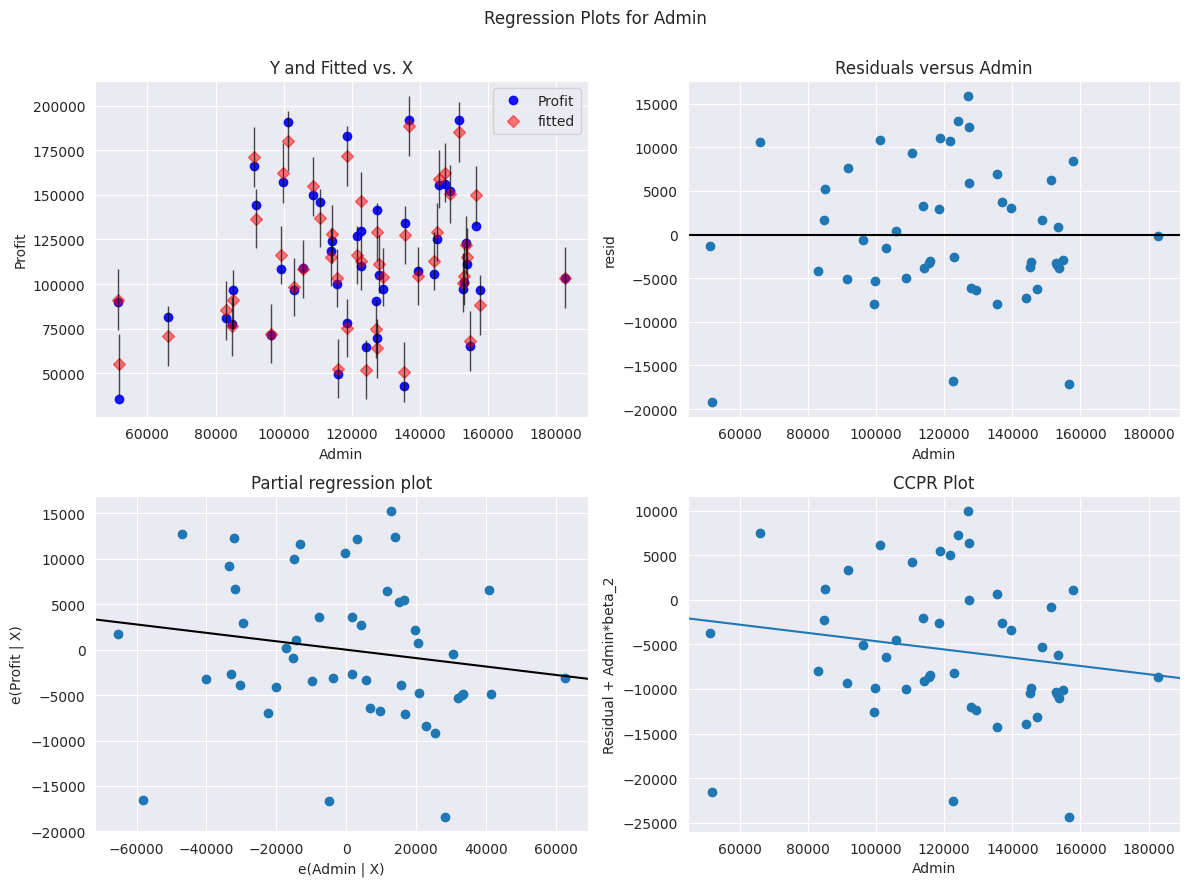

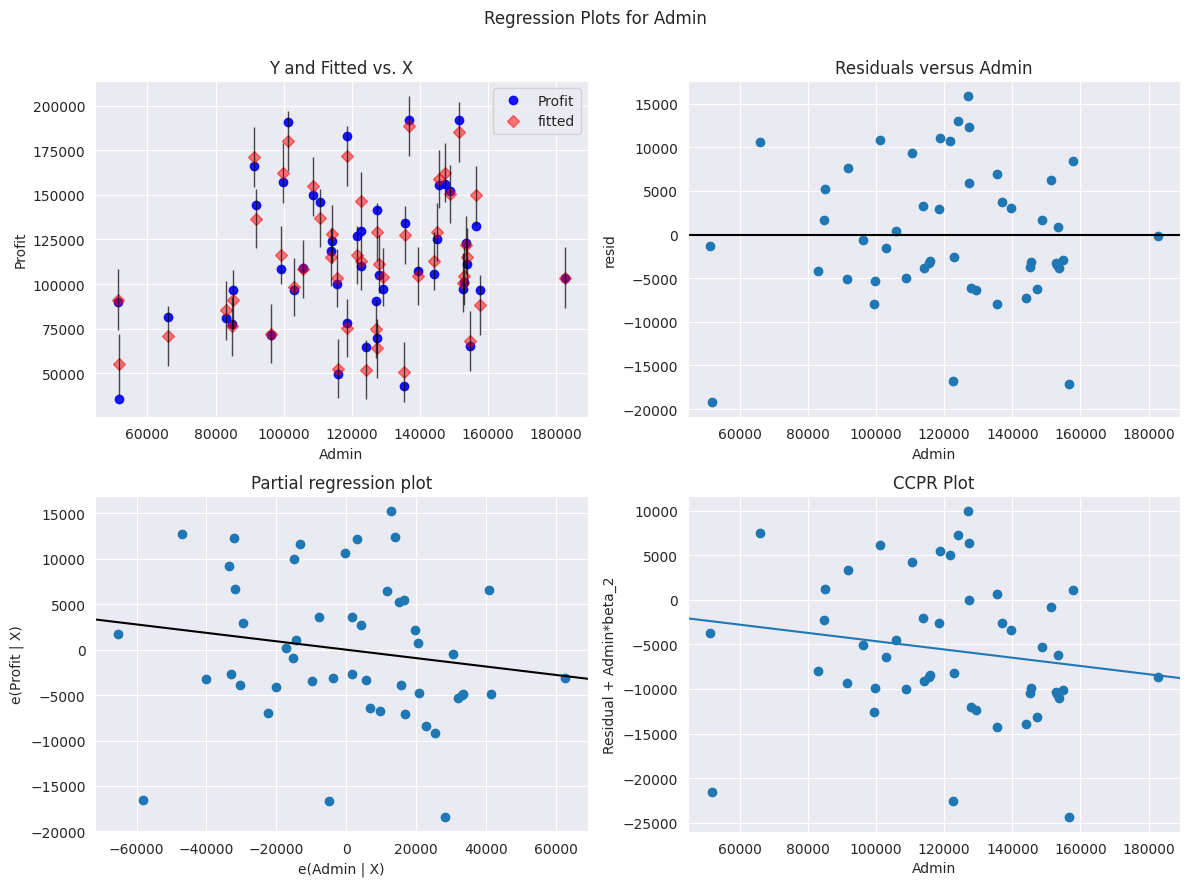

In [ ]:
fig = plt.figure(figsize=(12,9))
sm.graphics.plot_regress_exog(admin_present_model, 'Admin', fig = fig)

In [ ]:
marketing_present_model = smf.ols('Profit~RnD+Marketing', data = df4).fit()
marketing_present_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           3.74e-33
Time:                        05:45:19   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RnD            0.7754      0.035     22.136      0.000       0.705       0.846
Marketing      0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

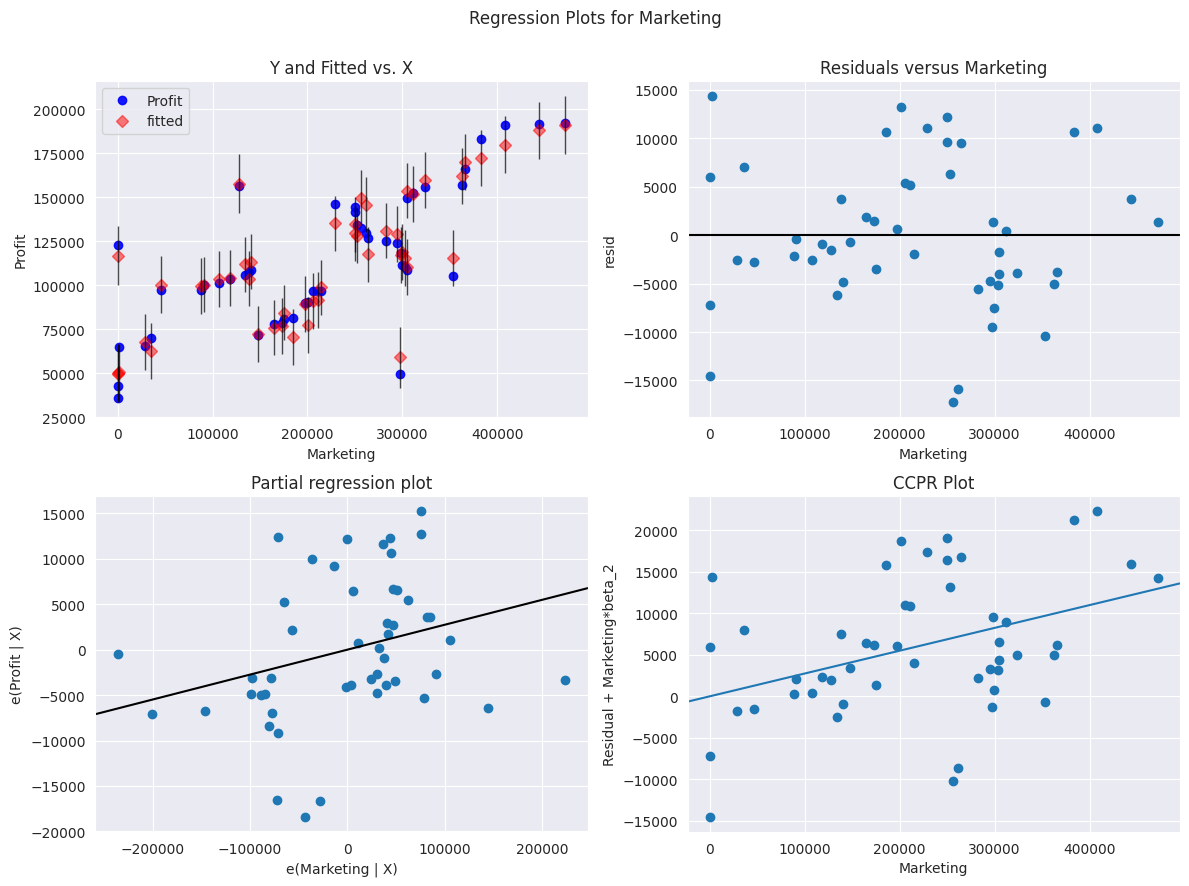

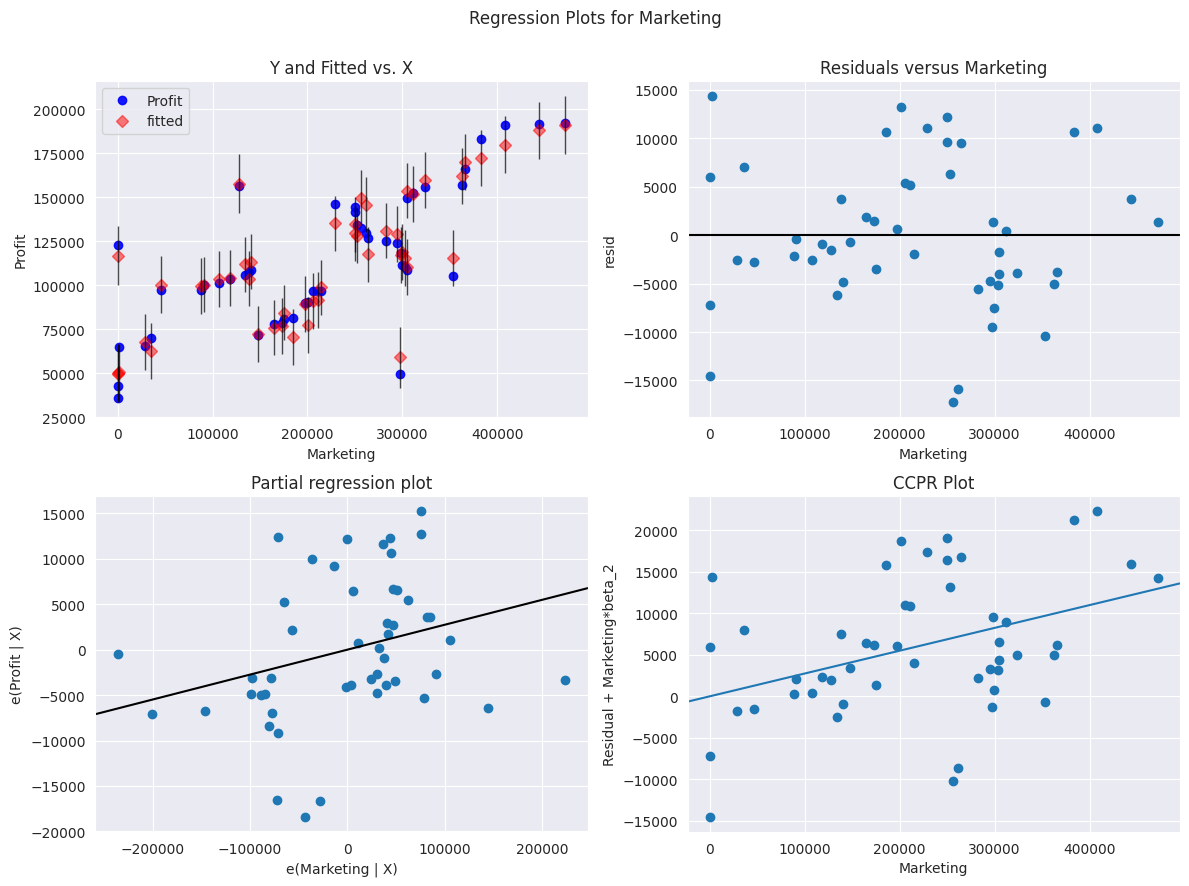

In [ ]:
fig = plt.figure(figsize = (12,9))
sm.graphics.plot_regress_exog(marketing_present_model, 'Marketing', fig = fig)

**^Observation: All our Assumptions are satisfied by the above model**

*  Feature should be independent of each other there should'nt be any dependency upon each other
*  it is satisfied by the model using Marketing feature
*  While building a model using Marketing we got better results better AIC, BIC, R-squared, R-squared adjusted, p_value(Test of Independence) and F-statistics score by comparing it with the model in which Adminstration feature was used.

### Let's compare the residuals of both the models to come up with an conclusion

### Model Validation
### Comparing different models with respect to their Root Mean Squared Errors

### We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.

In [ ]:
df_standard_scaled.columns

Index(['RnD', 'Admin', 'Marketing', 'Profit'], dtype='object')

In [ ]:
print('Admin Model:', np.sqrt(admin_present_model.mse_resid), '\n', 'Marketing model:', np.sqrt(marketing_present_model.mse_resid))

Admin Model: 7947.922013017302 
 Marketing model: 7691.884748549171


### Lets compare root mean square error and check for minimum value

In [ ]:
rmse_compare = {'Admin Model': np.sqrt(admin_present_model.mse_resid), 'Marketing model': np.sqrt(marketing_present_model.mse_resid)}
min(rmse_compare, key = rmse_compare.get)

'Marketing model'

**Observation: The model that is build without Admin feature performed very well**

*  Scoring minimum root mean square error and maximum rsquared and rsquared_adj


**Note: ** We are going to rebuild the model by droping the Admin feature.

In [ ]:
final_model = smf.ols('Profit~RnD+Marketing', data = df4).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           3.74e-33
Time:                        05:45:22   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RnD            0.7754      0.035     22.136      0.000       0.705       0.846
Marketing      0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Residual Analysis

*  Test for normality of residuals (Q-Q plot)

Text(0.5, 1.0, 'Normal Q-Q plot of residual')

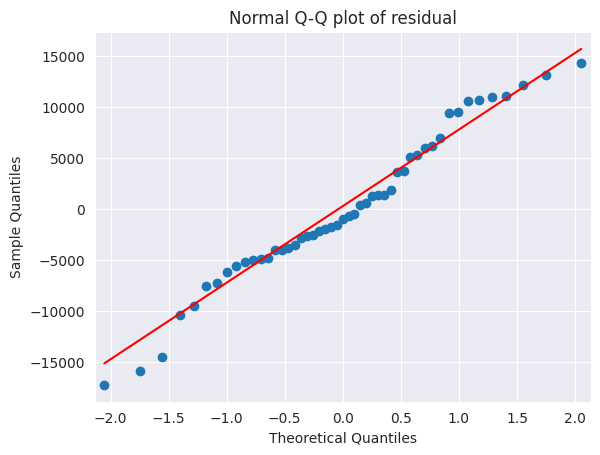

In [ ]:
  # residual values = y- yhat
  sm.qqplot(final_model.resid, line= 'q')
  plt.title('Normal Q-Q plot of residual')

**^Observation: Error should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.**

### Residual plot for homoscedasticity

In [ ]:
def get_standardized_values(vals):
  return (vals - vals.mean())/(vals.std())

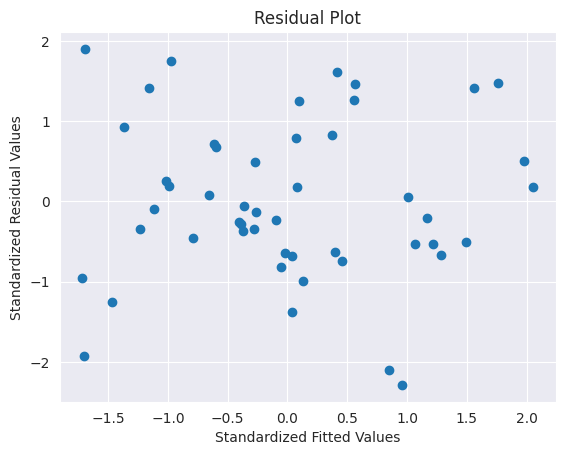

In [ ]:
plt.scatter(get_standardized_values(final_model.fittedvalues), get_standardized_values(final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

**^Observation: Constant Variance (Homoscedasticity) in Error**


### Residual VS Regressors

*  Plotting to visualize the partial relation of each independent feature with the Dependent variable and errors

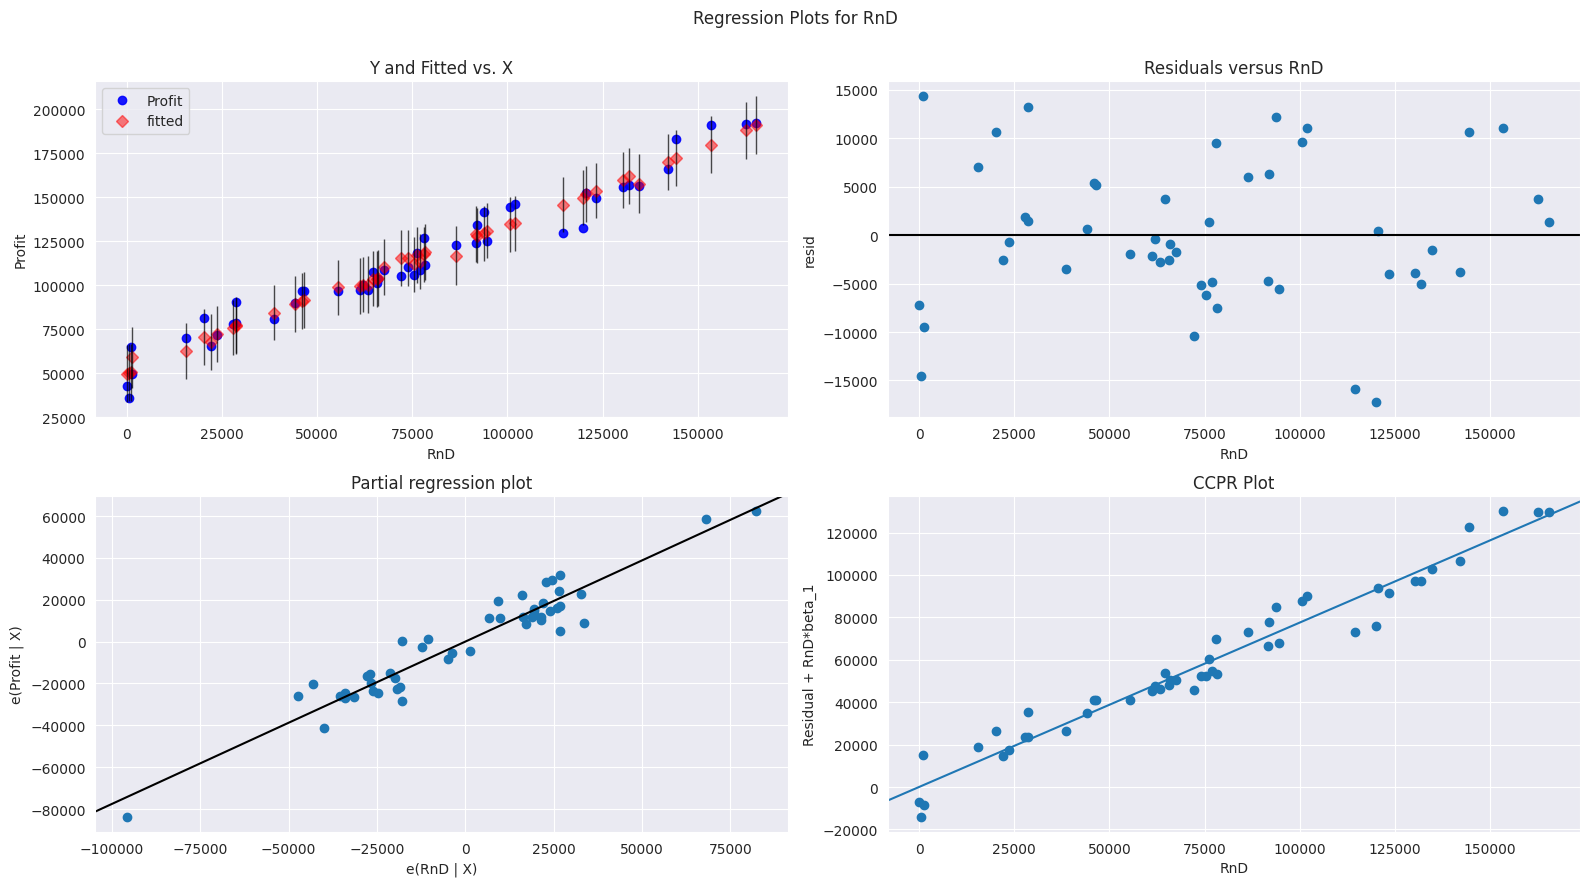

In [ ]:
fig = plt.figure(figsize = (16,9))
plot_RnD = sm.graphics.plot_regress_exog(final_model, 'RnD', fig = fig)

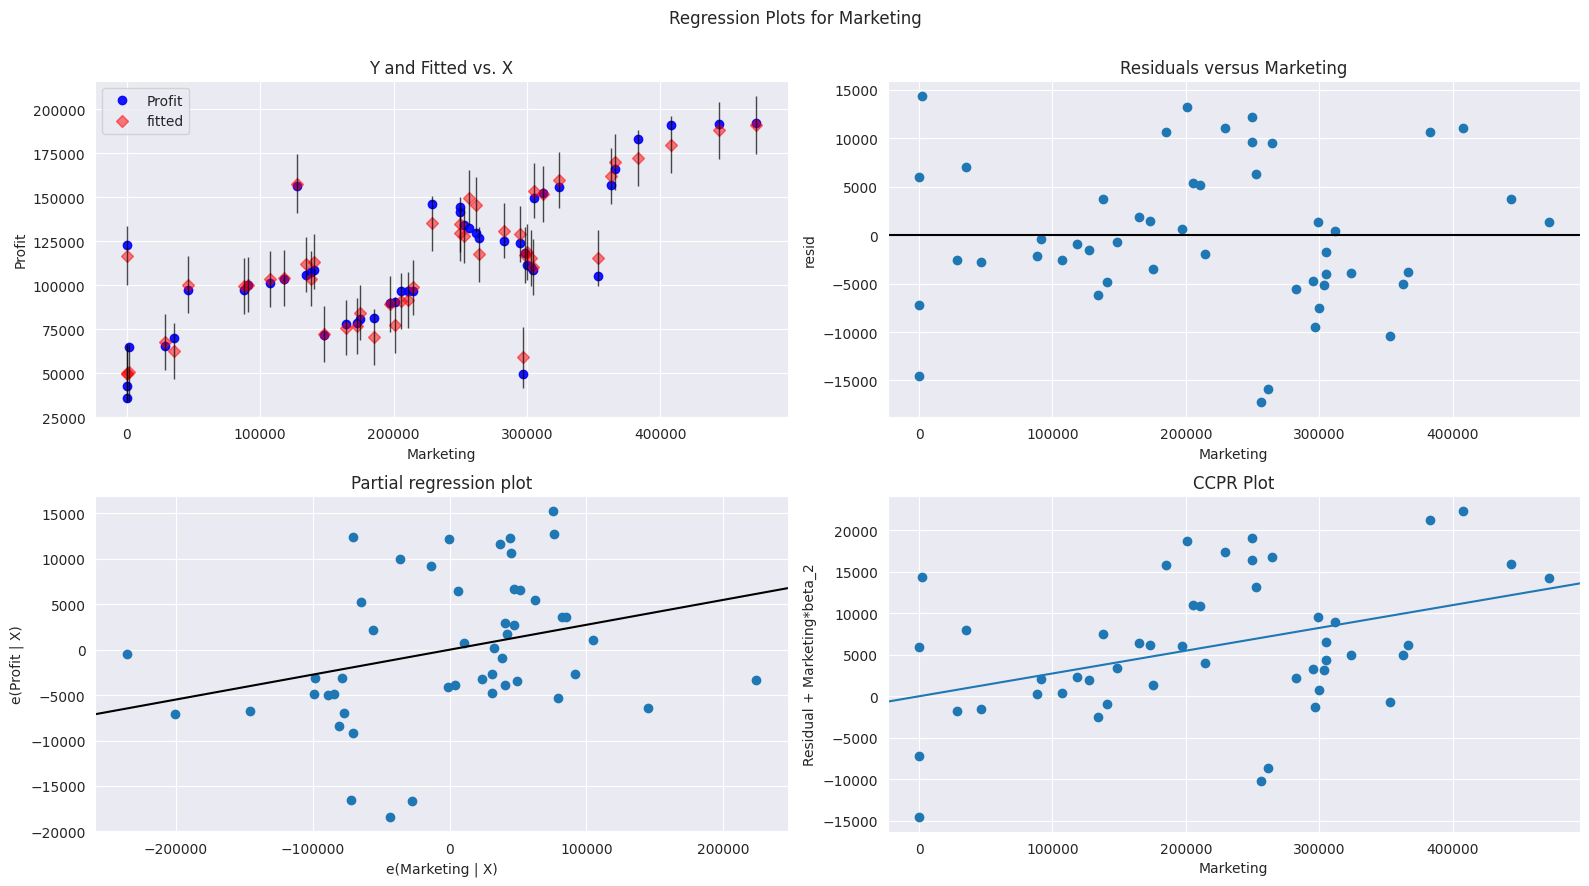

In [ ]:
fig = plt.figure(figsize = (16,9))
plot_marketing = sm.graphics.plot_regress_exog(final_model, 'Marketing', fig = fig)

**^Observation:**
* Each Feature and Model Error (residuals) should be independent of each other
* There should be a linear relation between the dependent variable and Independent variables

**Note:** All our assumptions are satisfied. Hence, we can say our model is a good model let us test more to make it even better


### Detecting Influencers/Outliers in model

*By using Cook's Distance.

In [ ]:
influence_points = final_model.get_influence()
c, p_value = influence_points.cooks_distance

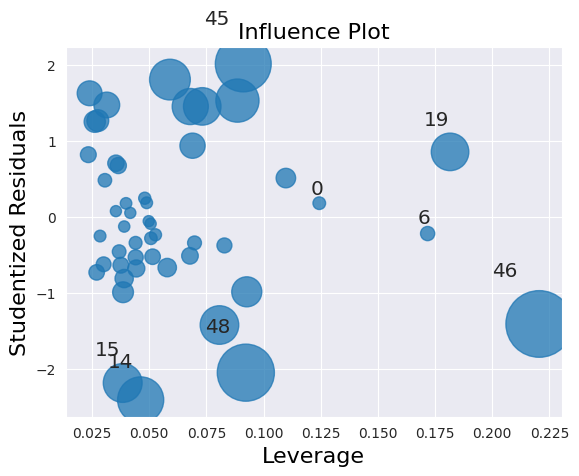

In [ ]:
# Leverage value using high influence points: points beyond leverage_cutoff value are influencers

influence_plot(final_model)
plt.show()

### Leverage-cutoff value = 3* (k+1)/n , k= no of features/columns & n = No of datapoints

In [ ]:
k = df4.shape[1]
n = df4.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Leverage cut-off line at  :' , np.round(leverage_cutoff, 2))

Leverage cut-off line at  : 0.31


### Lets plot the influencers and leverage cut-off line using STEM plot

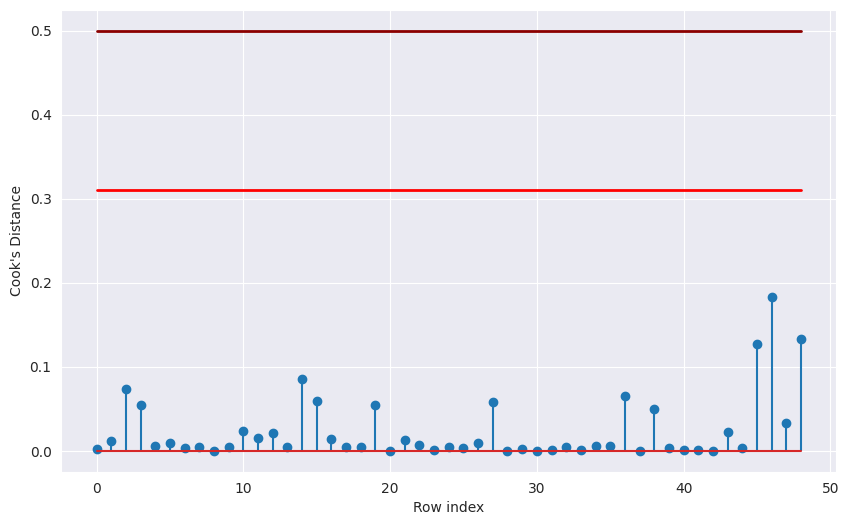

In [ ]:
fig = plt.figure(figsize = (10,6))
x = [0,48]
y = [0.5, 0.5]
plt.plot(x,y, color = 'darkred', linewidth = 2)
y1 = [0.31,0.31]
plt.plot(x, y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(df4)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

**Observations : All points are below our cut-off line**

* Hence, we can say that there are no influncers present in our model we can proceed with the predictions

### Predicting values from model using same dataset

In [ ]:
predicted = pd.DataFrame()
predicted['RnD'] = df4.RnD
predicted['Marketing'] = df4.Marketing
predicted['Profit'] = df4.Profit
predicted['Predicted_Profit'] = pd.DataFrame(final_model.predict(predicted[['RnD', 'Marketing']]))
predicted

,RnD,Marketing,Profit,Predicted_Profit
0,165349.20,471784.10,192261.83,190942.726927
1,162597.70,443898.53,191792.06,188043.924520
2,153441.51,407934.54,191050.39,179957.312472
3,144372.41,383199.62,182901.99,172246.416164
4,142107.34,366168.42,166187.94,170022.687457
5,131876.90,362861.36,156991.12,161999.405410
6,134615.46,127716.82,156122.51,157669.178690
7,130298.13,323876.68,155752.60,159705.298181
8,120542.52,311613.29,152211.77,151804.380605
9,123334.88,304981.62,149759.96,153787.521922


### Table containing r-squared values for each prepaired model

In [ ]:
models={'Different_Models':['Raw_data','Median_Imputation_Outlier','Mean_Imputation_outlier','Removed_outlier','Final_Model'],
        'R_squared':[raw_model.rsquared,after_median_imputation_model.rsquared,after_mean_imputation_model.rsquared,removed_outlier_model.rsquared,final_model.rsquared],
        'R_squared_adjusted':[raw_model.rsquared_adj,after_median_imputation_model.rsquared_adj,after_mean_imputation_model.rsquared_adj,removed_outlier_model.rsquared_adj,final_model.rsquared_adj],
       'RMSE':[np.sqrt(raw_model.mse_resid),np.sqrt(after_median_imputation_model.mse_resid),np.sqrt(after_mean_imputation_model.mse_resid),np.sqrt(removed_outlier_model.mse_resid),np.sqrt(final_model.mse_resid)]}
model_table=pd.DataFrame(models)
model_table

,Different_Models,R_squared,R_squared_adjusted,RMSE
0,Raw_data,0.950746,0.947534,9232.334837
1,Median_Imputation_Outlier,0.918296,0.912967,11148.345424
2,Mean_Imputation_outlier,0.911954,0.906212,11570.325358
3,Removed_outlier,0.961316,0.958737,7753.807752
4,Final_Model,0.961086,0.959394,7691.884749


### Visualizing models performance

<ipython-input-74-7434467f1fb4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R_squared', y='Different_Models', data = model_table, palette='Blues_d', ax = axes[0])
<ipython-input-74-7434467f1fb4>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R_squared_adjusted', y='Different_Models', data = model_table, palette='Reds_d', ax = axes[1])


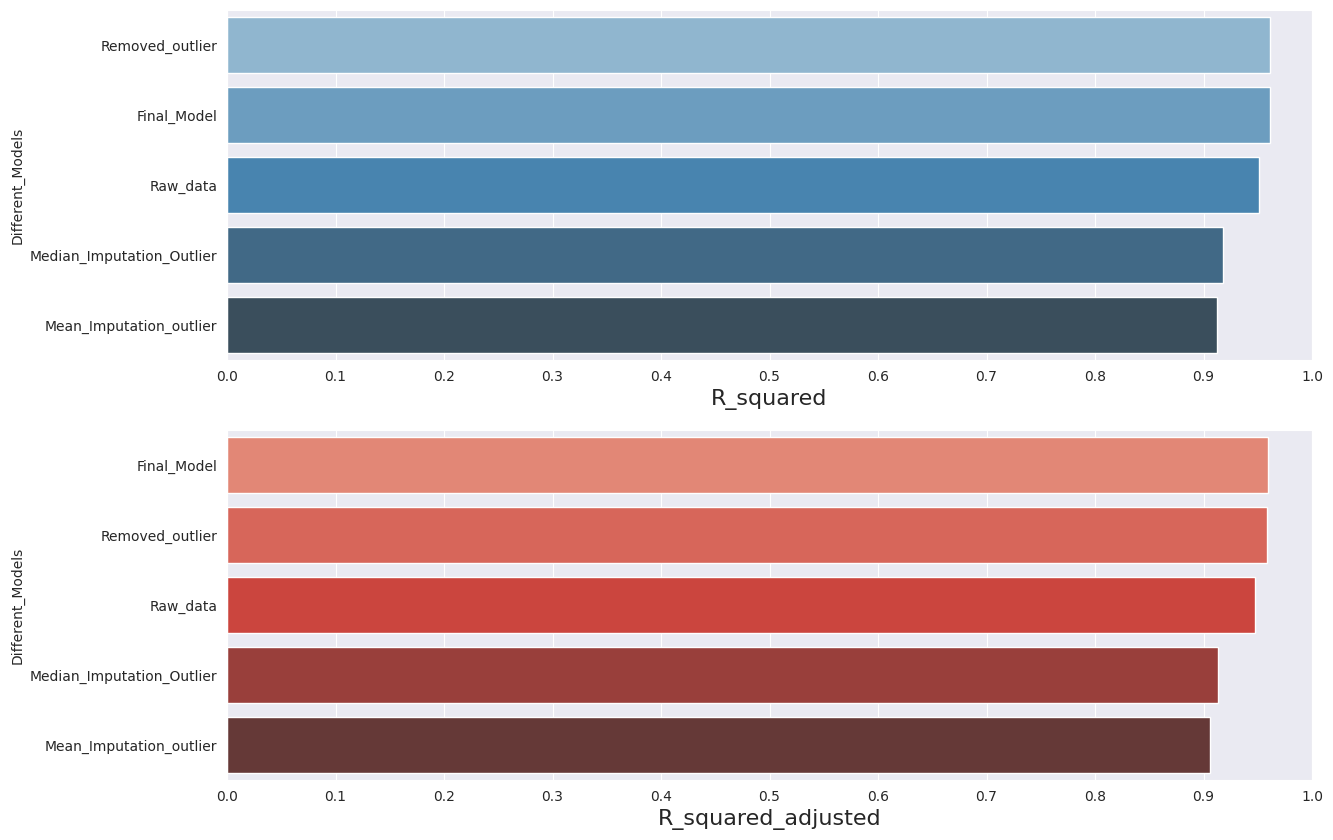

In [ ]:
f, axes = plt.subplots(2,1, figsize=(14,10))

model_table.sort_values(by=['R_squared'], ascending=False, inplace=True)

sns.barplot(x='R_squared', y='Different_Models', data = model_table, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('R_squared', size=16)
axes[0].set_ylabel('Different_Models')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

model_table.sort_values(by=['R_squared_adjusted'], ascending=False, inplace=True)

sns.barplot(x='R_squared_adjusted', y='Different_Models', data = model_table, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('R_squared_adjusted', size=16)
axes[1].set_ylabel('Different_Models')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

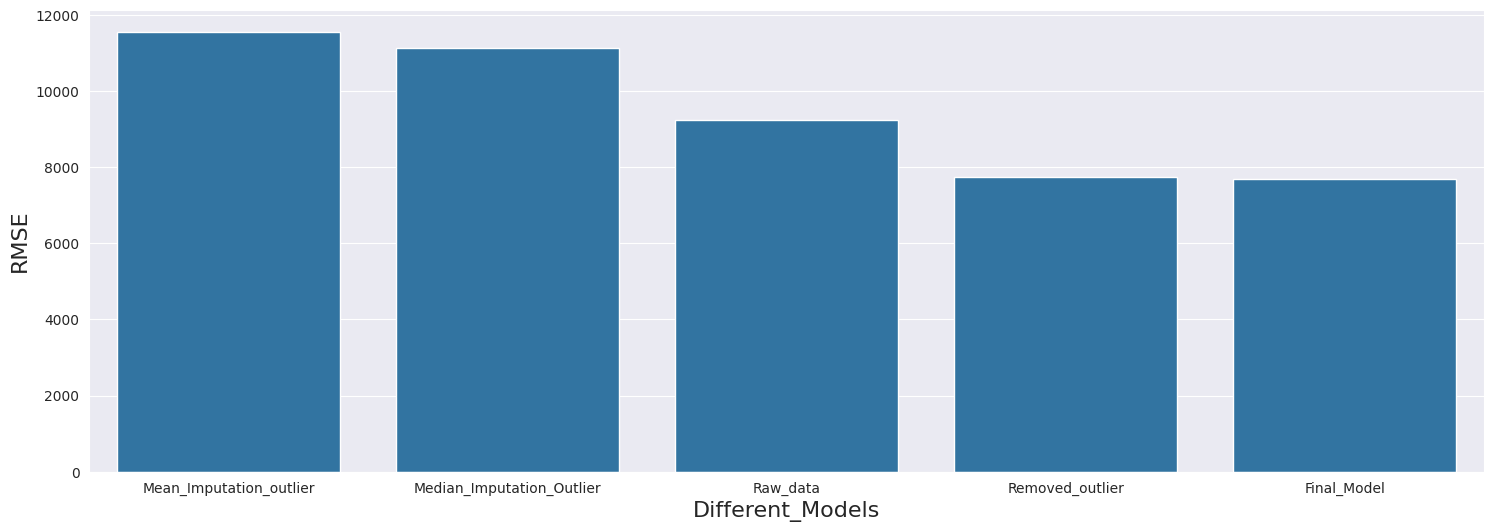

In [ ]:
model_table.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Different_Models', y='RMSE', data=model_table, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()